In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
%matplotlib inline
from google.colab import files
import os
import imutils
from imutils import contours
from skimage import measure
import tensorflow as tf
from tensorflow import keras


import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow 


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

print(tf.__version__)

1.14.0


In [0]:
from zipfile import ZipFile
file_name = '/content/drive/My Drive/Colab Notebooks/Dataset.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

# get_ipython().system_raw("unrar x leapGestRecog.rar ")

Done


In [0]:
# import shutil

# shutil.rmtree('/content/Dataset')

In [0]:

imagepaths = []


for root, dirs, files in os.walk("./Dataset", topdown=False): 
  for name in files:
    path = os.path.join(root, name)
    if path.endswith("png"): 
      imagepaths.append(path)
     
      

print(len(imagepaths))


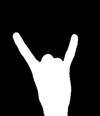

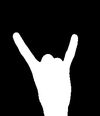

In [0]:
image = cv2.imread(imagepaths[1000])
image = np.array(image, dtype="uint8")

cv2_imshow(image)


image.shape
# image.reshape(1,-1)


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
gray_image.shape
# image.reshape(1,-1)
img = gray_image.reshape(116, 100, 1)


In [0]:
i = './Dataset/L/2_L517.png'
int(i.split('/')[3][0])

2

In [0]:
X = []
y = []

for path in imagepaths:
  image = cv2.imread(path)
  image = np.array(image, dtype="uint8")
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  X.append(gray_image.reshape(116, 100, 1))
  y.append(int(path.split('/')[3][0]))




In [0]:
X.shape
#120,320,1

(15005, 116, 100, 1)

In [0]:
X = np.array(X, dtype="uint8")
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[1000], imagepaths[1000])

Images loaded:  15005
Labels loaded:  15005
5 ./Dataset/U/5_U1457.png


In [0]:
ts = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)


In [0]:

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [0]:

model = Sequential()
model.add(Conv2D(32, (5), activation='relu', input_shape=(116, 100, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [0]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1, validation_data=(X_test, y_test))

Train on 10503 samples, validate on 4502 samples
Epoch 1/5
10503/10503 [==============================] - 9s 835us/step - loss: 12.8948 - acc: 0.1991 - val_loss: 12.8602 - val_acc: 0.2021
Epoch 2/5
10503/10503 [==============================] - 8s 753us/step - loss: 12.9061 - acc: 0.1993 - val_loss: 12.8601 - val_acc: 0.2021
Epoch 3/5
10503/10503 [==============================] - 8s 748us/step - loss: 12.9061 - acc: 0.1993 - val_loss: 12.8601 - val_acc: 0.2021
Epoch 4/5
10503/10503 [==============================] - 8s 757us/step - loss: 12.9061 - acc: 0.1993 - val_loss: 12.8601 - val_acc: 0.2021
Epoch 5/5
10503/10503 [==============================] - 8s 763us/step - loss: 12.9061 - acc: 0.1993 - val_loss: 12.8601 - val_acc: 0.2021


In [0]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

4502/4502 [==============================] - 1s 319us/step
Test accuracy: 20.21%


In [0]:
model.save('hgr_model2.h5')

In [0]:
# model = '/contents/hgr_model1.h5'
from keras.models import load_model
model = load_model("hgr_model1.h5")


In [0]:
predictions = model.predict(X_test)

In [0]:
predictions[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
np.argmax(predictions[300]), y_test[300] 

(4, 1)

In [0]:
y_pred = np.argmax(predictions, axis=1) 

In [0]:
g_login = GoogleAuth()
g_login.LocalWebserverAuth()
drive = GoogleDrive(g_login)


In [0]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted K", "Predicted L", "Predicted P", "Predicted T", "Predicted U"],
             index=["Actual K", "Actual L", "Actual P", "Actual Fist T", "Actual U"])

,Predicted K,Predicted L,Predicted P,Predicted T,Predicted U
Actual K,720,0,110,75,7
Actual L,23,805,17,65,0
Actual P,43,25,706,77,16
Actual Fist T,43,92,223,547,4
Actual U,0,1,0,0,903
